In [11]:
from scipy import stats
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
DATA_DIR = Path("../data")

In [5]:
wlen_regr = np.load(DATA_DIR / "wlen_out.npy")
spec = np.load(DATA_DIR / "algn.npy")

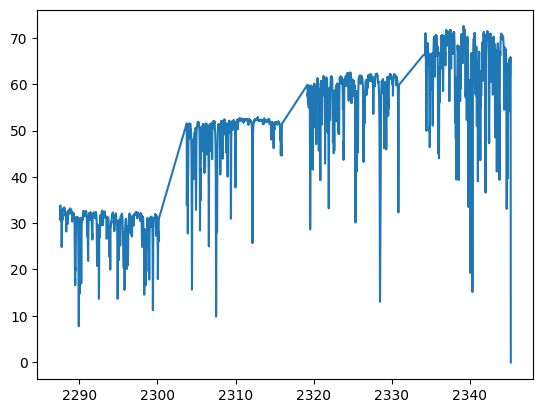

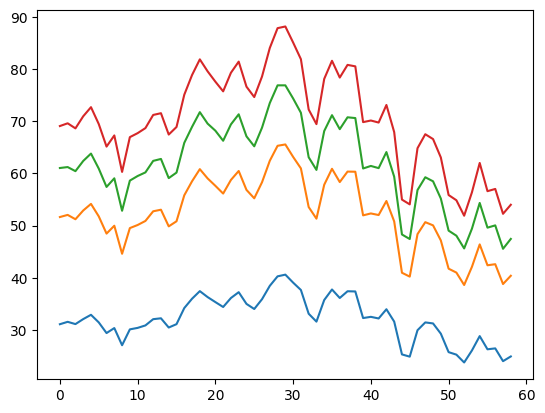

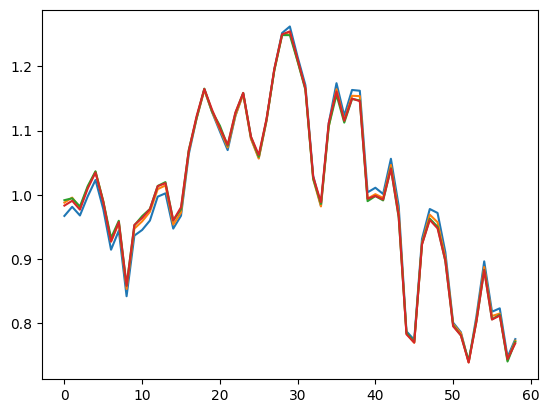

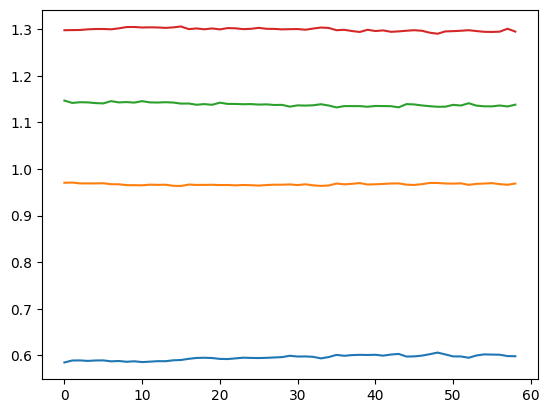

0.5949607070830493
0.9670084797706832
1.1385024929157008
1.2995283202305665


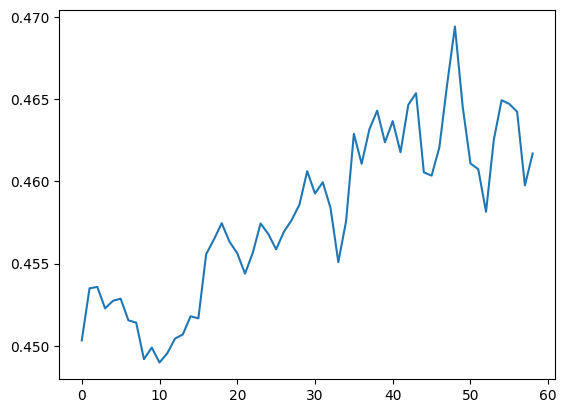

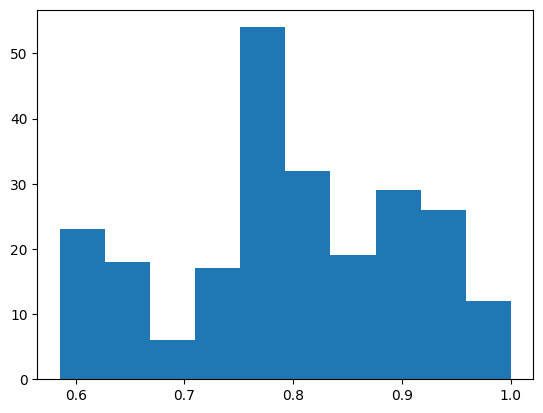

0.79687838195182


In [8]:
plt.plot(wlen_regr.flatten(), spec.mean(axis=1).flatten())
plt.show()

def get_ampl():
	vsort = np.sort(spec)
	ampl = (vsort[..., 856] + vsort[..., 857]) / 2
	return ampl

ampl = get_ampl()

for vec in ampl:
	plt.plot(vec)
	#plt.show()
plt.show()

for vec in ampl:
	plt.plot(vec / vec.mean())
	#plt.show()
plt.show()

for vec in ampl:
	plt.plot(vec / ampl.mean(axis=0))
	#plt.show()
plt.show()

for vec in ampl:
	print(vec.mean() / ampl.mean())

plt.plot(ampl[0] / ampl[-1])
plt.show()

ampl_norm = ampl / ampl.max(axis=1)[:, None]
plt.hist(ampl_norm.flatten())
plt.show()
print(ampl_norm.flatten().mean())

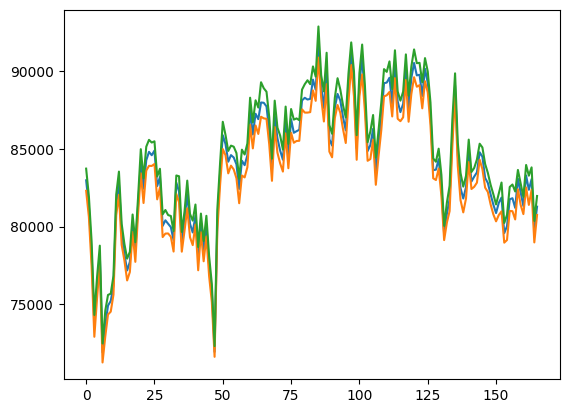

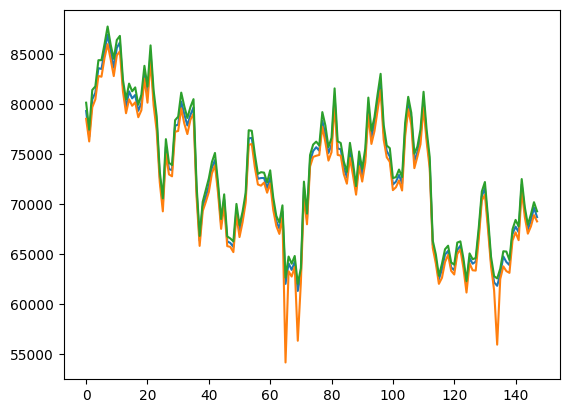

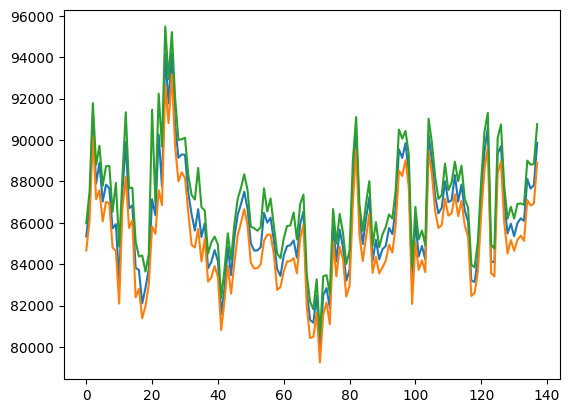

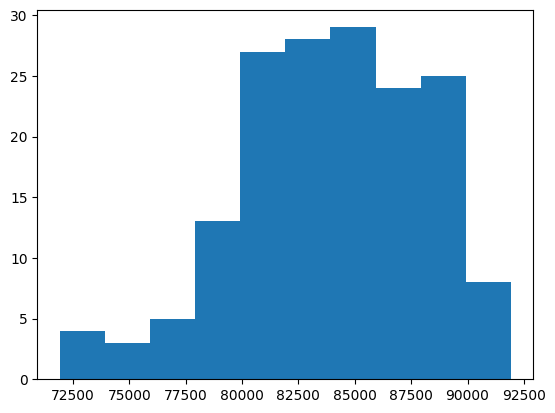

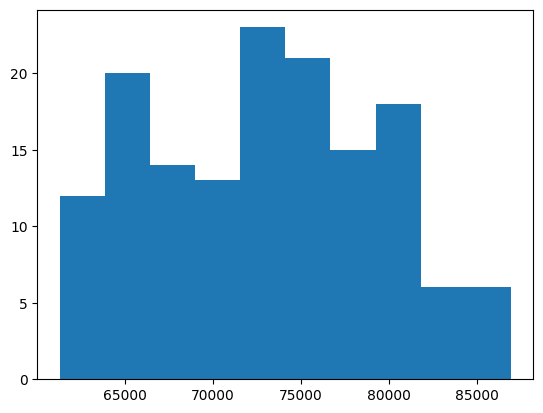

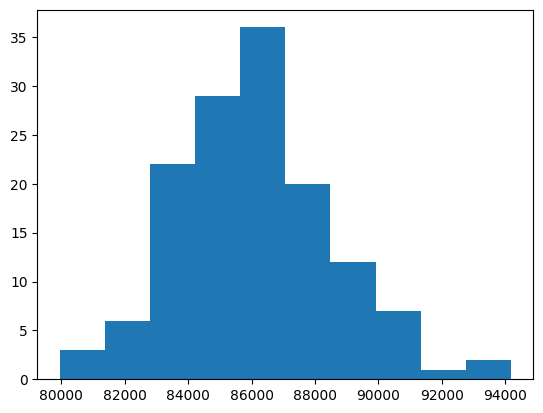

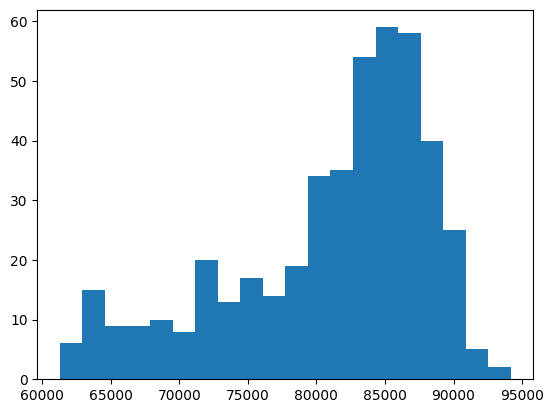

In [9]:
obs1 = np.load("res_night1.npy")
obs2 = np.load("res_night2.npy")
obs3 = np.load("res_night3.npy")

plt.plot(obs1[0])
plt.plot(obs1[1])
plt.plot(obs1[2])
plt.show()
plt.plot(obs2[0])
plt.plot(obs2[1])
plt.plot(obs2[2])
plt.show()
plt.plot(obs3[0])
plt.plot(obs3[1])
plt.plot(obs3[2])
plt.show()
plt.hist(obs1[0])
plt.show()
plt.hist(obs2[0])
plt.show()
plt.hist(obs3[0])
plt.show()
obs_con = np.concatenate((obs1[0], obs2[0], obs3[0]))
plt.hist(obs_con, bins=20)
plt.show()

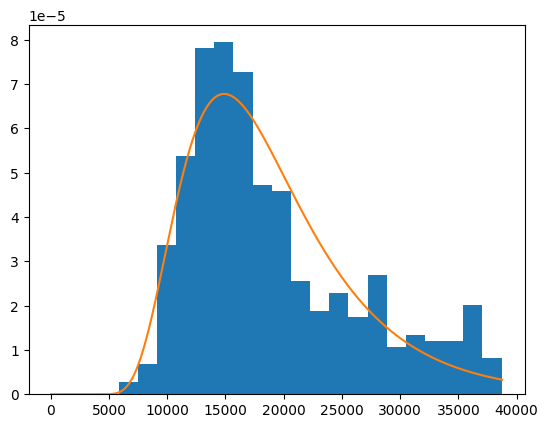

In [14]:
obs = 100000 - np.concatenate((obs1[0], obs2[0], obs3[0]))
plt.hist(obs, bins=20, density=True)
params = stats.lognorm.fit(obs)
distribution = stats.lognorm(*params)
span = np.arange(obs.max(), step=obs.max() / 1000) + obs.max() / 1000
plt.plot(span, distribution.pdf(span), label="Fitted lognorm PDF")
plt.show()